In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
from tds_utils import *
import numpy as np
from IPython.display import Audio
import math


In [4]:
#Calculando valores

In [25]:
#Importar la señal
%matplotlib notebook
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

import scipy.io.wavfile as wf


class clasePalabra:

    def __init__(self):

        self.fs = 0
        self.y = 0
        self.NumVentana = 0
        self.MuestraVentana = 0
        
i=1
arrayPalabras = []

while i < 9:
    filename = "Isa/"+str(i)+".wav"

    fs,y = wf.read(filename)
    palabra  = clasePalabra()
    palabra.fs= fs
    palabra.y = y
    t = np.arange(0,len(palabra.y)/palabra.fs,1/palabra.fs)
    palabra.numVentana =  math.floor(max(t)/0.02)
    palabra.muestrasVentana = math.floor(len(palabra.y)/palabra.numVentana)
    arrayPalabras.append(palabra)
    i=i+1
#Play the signal at fs
import sounddevice as sd
print(fs)
sd.play(y,fs)

44100


<IPython.core.display.Javascript object>


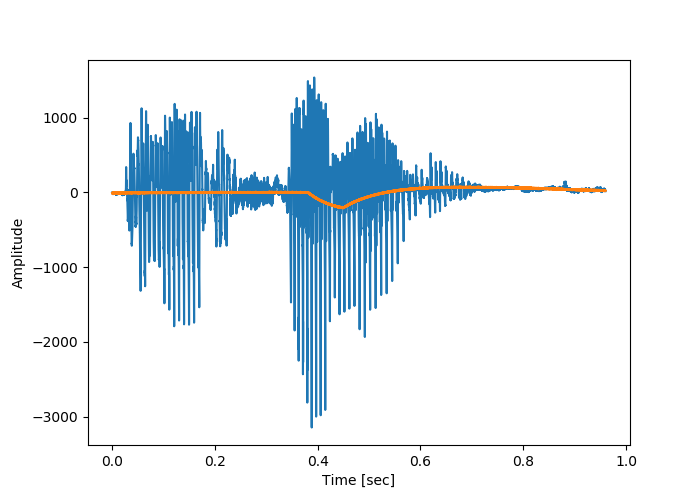

Text(0,0.5,'Amplitude')

In [16]:
#Representar la señal
#plot wav signal
import numpy as np

#time vector de y que es mi señal
t= np.arange(0,len(y)/fs,1/fs)
#equivalente a t= np.arange(0,len(y),fs)

plt.figure(figsize = (7,5))

#plot figure
plt.plot(t,y)


plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')

In [17]:
#Muestras por s 
t = np.arange(0,len(y)/fs,1/fs)
print(max(t))

#Maxt / tamaño ventana 20 ms y almacenar num ventana
#Aniquilar jijijiji

numVentana =  math.floor(max(t)/0.02)
print(numVentana)

0.9597732426303855
47


In [18]:
#Calcular el numero de muestras en 20 ms el cual necesitaremos para el rango de cada ventana
# muestras totales / 42  ----> x muestras /ventana
muestrasVentana = math.floor(len(y)/numVentana)
print(muestrasVentana)

900


In [6]:



#----------------------------------------------------------------------

#print(Canal_1)
i = 0
pitch = []
k = []
while i < numVentana:
    seg = y[muestrasVentana*(i):muestrasVentana*(i+1)]
    Canal_1 = seg[:,0]
    psd1,f1 = my_spectra(Canal_1,fs)
    length = 0
    while f1[length]<0:
        length = length + 1
    psd=psd1[length:]
    f=f1[length:]
    umbral = 50
    umbralBaja = 0
    j=3
    l=True
    while l==True:
        if psd[j+1]<psd[j]:
            j=j+1
        else:
            l=False
    while j<23:
        if psd[j+2] < psd[j] and psd[j+2] > umbral :
            pitch.append(f[j])
            k.append(i)
            break
        j=j+1
        #pitch=0.0
    i = i+1
print(pitch)
print(k)
media=0
media = np.mean(pitch[0:len(pitch)])
print(media)

[129.19921875, 107.666015625, 107.666015625, 86.1328125, 86.1328125, 86.1328125, 107.666015625, 86.1328125, 107.666015625, 107.666015625, 107.666015625, 107.666015625, 107.666015625, 107.666015625, 86.1328125, 86.1328125, 86.1328125, 86.1328125, 86.1328125, 64.599609375, 64.599609375]
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
95.361328125


In [8]:
#Visualizar el canal 0, 1
print(seg.shape)


(899, 2)


In [9]:
psd1,f1 = my_spectra(Canal_1,fs)
length = 0
while f1[length]<0:
    length = length + 1
psd=psd1[length:]
f=f1[length:]
umbral = 5
i=3
l=True
while l==True:
    if psd[i+1]<psd[i]:
        i=i+1
    else:
        l=False
while i<500:
    if psd[i+2] < psd[i] and psd[i+2] > umbral :
        pitch = f[i]
        break
    i=i+1
    pitch=0.0

print(pitch)



193.798828125
